# World Cup ML Project

## Import package and check for version

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [40]:
import sklearn
import keras
import xgboost

In [3]:
# check version
import sys
version = ".".join(map(str, sys.version_info[:3]))
print('Python version:', version)
print('sklearn version:', sklearn.__version__)
print('keras version:', keras.__version__)
print('xgboost version:', xgboost.__version__)

Python version: 3.9.13
sklearn version: 1.0.2
keras version: 2.11.0
xgboost version: 1.7.1


## Data preprocessing and descriptive analysis

In [41]:
pwd

'/Users/chenyiqi/Desktop/DNSC4280/Project_WorldCup'

### international_matches data set

In [42]:
# read international_matches data
df = pd.read_csv('./data/international_matches.csv', parse_dates=['date'])
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [6]:
# check column name, null, dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

In [7]:
# check column and row
df.shape

(23921, 25)

In [8]:
# check for null
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [9]:
# check basic statistics of continuous variable
df.describe(include=['number'])

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [10]:
# basic statistics of categorical variable
df.describe(include=['object'])

,home_team,away_team,home_team_continent,away_team_continent,tournament,city,country,shoot_out,home_team_result
count,23921,23921,23921,23921,23921,23921,23921,23921,23921
unique,211,211,6,6,82,1576,217,2,3
top,Mexico,Zambia,Europe,Europe,Friendly,Doha,USA,No,Win
freq,316,243,7593,7359,8558,397,1003,23589,11761


In [11]:
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].isnull().sum()

home_team              0
away_team              0
home_team_continent    0
away_team_continent    0
tournament             0
city                   0
country                0
shoot_out              0
home_team_result       0
dtype: int64

In [12]:
# check for cardinality in categorical variables - too many unique values not good for prediction
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

home_team  contains  211  labels
away_team  contains  211  labels
home_team_continent  contains  6  labels
away_team_continent  contains  6  labels
tournament  contains  82  labels
city  contains  1576  labels
country  contains  217  labels
shoot_out  contains  2  labels
home_team_result  contains  3  labels


In [13]:
# check for target variables
df['home_team_result'].unique()

array(['Win', 'Draw', 'Lose'], dtype=object)

In [14]:
df.home_team_result.value_counts()

Win     11761
Lose     6771
Draw     5389
Name: home_team_result, dtype: int64

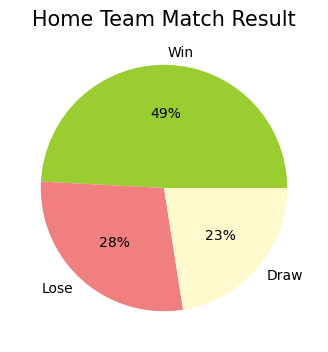

In [15]:
unique_result = df['home_team_result'].value_counts()

# Plot
fig, axes = plt.subplots(1, 1, figsize=(4,4))
ax =plt.pie(unique_result ,labels = ['Win', 'Lose', 'Draw'], colors=['yellowgreen','lightcoral','lemonchiffon'], autopct='%.0f%%')
plt.title('Home Team Match Result', fontsize = 15)
plt.get_cmap('jet')
plt.show()

In [16]:
# check for data set duration
print(f'The earliest date is', df[['date']].min().date)
print(f'The latest date is', df[['date']].max().date)

The earliest date is 1993-08-08 00:00:00
The latest date is 2022-06-14 00:00:00


**Comment**:
international_matches.csv is a interesting data set because the data frame include home team and away team variable. Each entry represents a match, thus we have 2 players per entry/row. We want to see how we can interact with it. It also has a lot of NAs, so we need to take care of that!

### players_22 data set

In [40]:
# literally don't know how can I use it, full of abbr.
players_22 = pd.read_csv('./data/players_22.csv')
players_22.shape

(19239, 110)

In [41]:
interested_columns = ['short_name', 'long_name', 'age', 'nationality_name', 'overall', 
                      'potential', 'club_name', 'value_eur', 'wage_eur', 'player_positions']
players_22 = pd.DataFrame(players_22, columns=interested_columns)
players_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   short_name        19239 non-null  object 
 1   long_name         19239 non-null  object 
 2   age               19239 non-null  int64  
 3   nationality_name  19239 non-null  object 
 4   overall           19239 non-null  int64  
 5   potential         19239 non-null  int64  
 6   club_name         19178 non-null  object 
 7   value_eur         19165 non-null  float64
 8   wage_eur          19178 non-null  float64
 9   player_positions  19239 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.5+ MB


In [42]:
players_22.isnull().sum()

short_name           0
long_name            0
age                  0
nationality_name     0
overall              0
potential            0
club_name           61
value_eur           74
wage_eur            61
player_positions     0
dtype: int64

In [45]:
# check for player stat, both numeric and categorical
players_22.describe(include='all')

,short_name,long_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
count,19239,19239,19239.000000,19239,19239.000000,19239.000000,19178,1.916500e+04,19178.000000,19239
unique,18145,19219,NaN,163,NaN,NaN,701,NaN,NaN,674
top,J. Rodríguez,Ladislav Krejčí,NaN,England,NaN,NaN,Paris Saint-Germain,NaN,NaN,CB
freq,13,2,NaN,1719,NaN,NaN,33,NaN,NaN,2423
mean,NaN,NaN,25.210822,NaN,65.772182,71.079370,NaN,2.850452e+06,9017.989363,NaN
std,NaN,NaN,4.748235,NaN,6.880232,6.086213,NaN,7.613700e+06,19470.176724,NaN
min,NaN,NaN,16.000000,NaN,47.000000,49.000000,NaN,9.000000e+03,500.000000,NaN
25%,NaN,NaN,21.000000,NaN,61.000000,67.000000,NaN,4.750000e+05,1000.000000,NaN
50%,NaN,NaN,25.000000,NaN,66.000000,71.000000,NaN,9.750000e+05,3000.000000,NaN
75%,NaN,NaN,29.000000,NaN,70.000000,75.000000,NaN,2.000000e+06,8000.000000,NaN


In [55]:
#okay I don't think there is duplicate
string = 'J. Rodríguez'
players_22.loc[players_22['short_name'] == string]

,short_name,long_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
310,J. Rodríguez,James David Rodríguez Rubio,29,Colombia,81,81,Everton,25500000.0,105000.0,"RW, CAM, CM"
467,J. Rodríguez,Jonathan Javier Rodríguez Portillo,27,Uruguay,80,80,Cruz Azul,23000000.0,79000.0,"ST, LW"
1775,J. Rodríguez,Jorge Agustín Rodríguez,25,Argentina,75,80,Estudiantes de La Plata,7500000.0,12000.0,"CDM, CM"
2971,J. Rodríguez,José Iván Rodríguez Rebollar,25,Mexico,73,79,Club León,4300000.0,17000.0,CDM
3031,J. Rodríguez,Juan Gabriel Rodríguez,27,Argentina,73,74,Defensa y Justicia,3100000.0,12000.0,CB
4688,J. Rodríguez,José Antonio Rodríguez Romero,28,Mexico,70,72,Club Deportivo Guadalajara,1400000.0,19000.0,GK
4892,J. Rodríguez,Juan David Rodríguez Rico,28,Colombia,70,70,Junior FC,1600000.0,2000.0,CM
8419,J. Rodríguez,Jonathan Emanuel Rodríguez,31,Argentina,67,67,CFR Cluj,725000.0,6000.0,"CDM, CM"
10420,J. Rodríguez,José Luis Rodríguez Francis,23,Panama,65,74,Real Sporting de Gijón,1600000.0,5000.0,LM
11348,J. Rodríguez,Jhoao Leandro Rodríguez González,25,Colombia,64,67,América de Cali,775000.0,1000.0,"LM, ST"


### Preprocessing

In [43]:
# extract rows contain 2022 World Cup participant teams
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 
             'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 
             'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 
             'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 
             'Wales', 'Australia', 'Costa Rica']
final_df = df[(df["home_team"].apply(lambda x: x in list_2022)) | (df["away_team"].apply(lambda x: x in list_2022))]

In [44]:
#Dropping unnecessary colums
final_df = final_df.drop(['date', 'home_team_continent', 'away_team_continent', 
                          'home_team_total_fifa_points', 'away_team_total_fifa_points', 
                          'home_team_score', 'away_team_score', 'tournament', 'city', 'country', 
                          'neutral_location', 'shoot_out'],axis=1)

In [45]:
# Change column names
final_df.rename(columns={"home_team":"Team1", "away_team":"Team2", 
                         "home_team_fifa_rank":"Team1_FIFA_RANK", 
                         "away_team_fifa_rank":"Team2_FIFA_RANK", 
                         "home_team_result":"Team1_Result", 
                         "home_team_goalkeeper_score":"Team1_Goalkeeper",
                        "away_team_goalkeeper_score":"Team2_Goalkeeper", 
                         "home_team_mean_defense_score":"Team1_Defense",
                        "home_team_mean_offense_score":"Team1_Offense", 
                         "home_team_mean_midfield_score":"Team1_Midfield",
                        "away_team_mean_defense_score":"Team2_Defense", 
                         "away_team_mean_offense_score":"Team2_Offense",
                        "away_team_mean_midfield_score":"Team2_Midfield"}, inplace=True)

In [46]:
final_df = final_df.reset_index()

In [47]:
final_df = final_df.drop(['index'],axis=1)

In [48]:
final_df.shape

(9321, 13)

In [49]:
# check for null
final_df.isnull().sum()

Team1                  0
Team2                  0
Team1_FIFA_RANK        0
Team2_FIFA_RANK        0
Team1_Result           0
Team1_Goalkeeper    4674
Team2_Goalkeeper    4794
Team1_Defense       4745
Team1_Offense       4561
Team1_Midfield      4623
Team2_Defense       4853
Team2_Offense       4657
Team2_Midfield      4733
dtype: int64

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9321 entries, 0 to 9320
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team1             9321 non-null   object 
 1   Team2             9321 non-null   object 
 2   Team1_FIFA_RANK   9321 non-null   int64  
 3   Team2_FIFA_RANK   9321 non-null   int64  
 4   Team1_Result      9321 non-null   object 
 5   Team1_Goalkeeper  4647 non-null   float64
 6   Team2_Goalkeeper  4527 non-null   float64
 7   Team1_Defense     4576 non-null   float64
 8   Team1_Offense     4760 non-null   float64
 9   Team1_Midfield    4698 non-null   float64
 10  Team2_Defense     4468 non-null   float64
 11  Team2_Offense     4664 non-null   float64
 12  Team2_Midfield    4588 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 946.8+ KB


<AxesSubplot:>

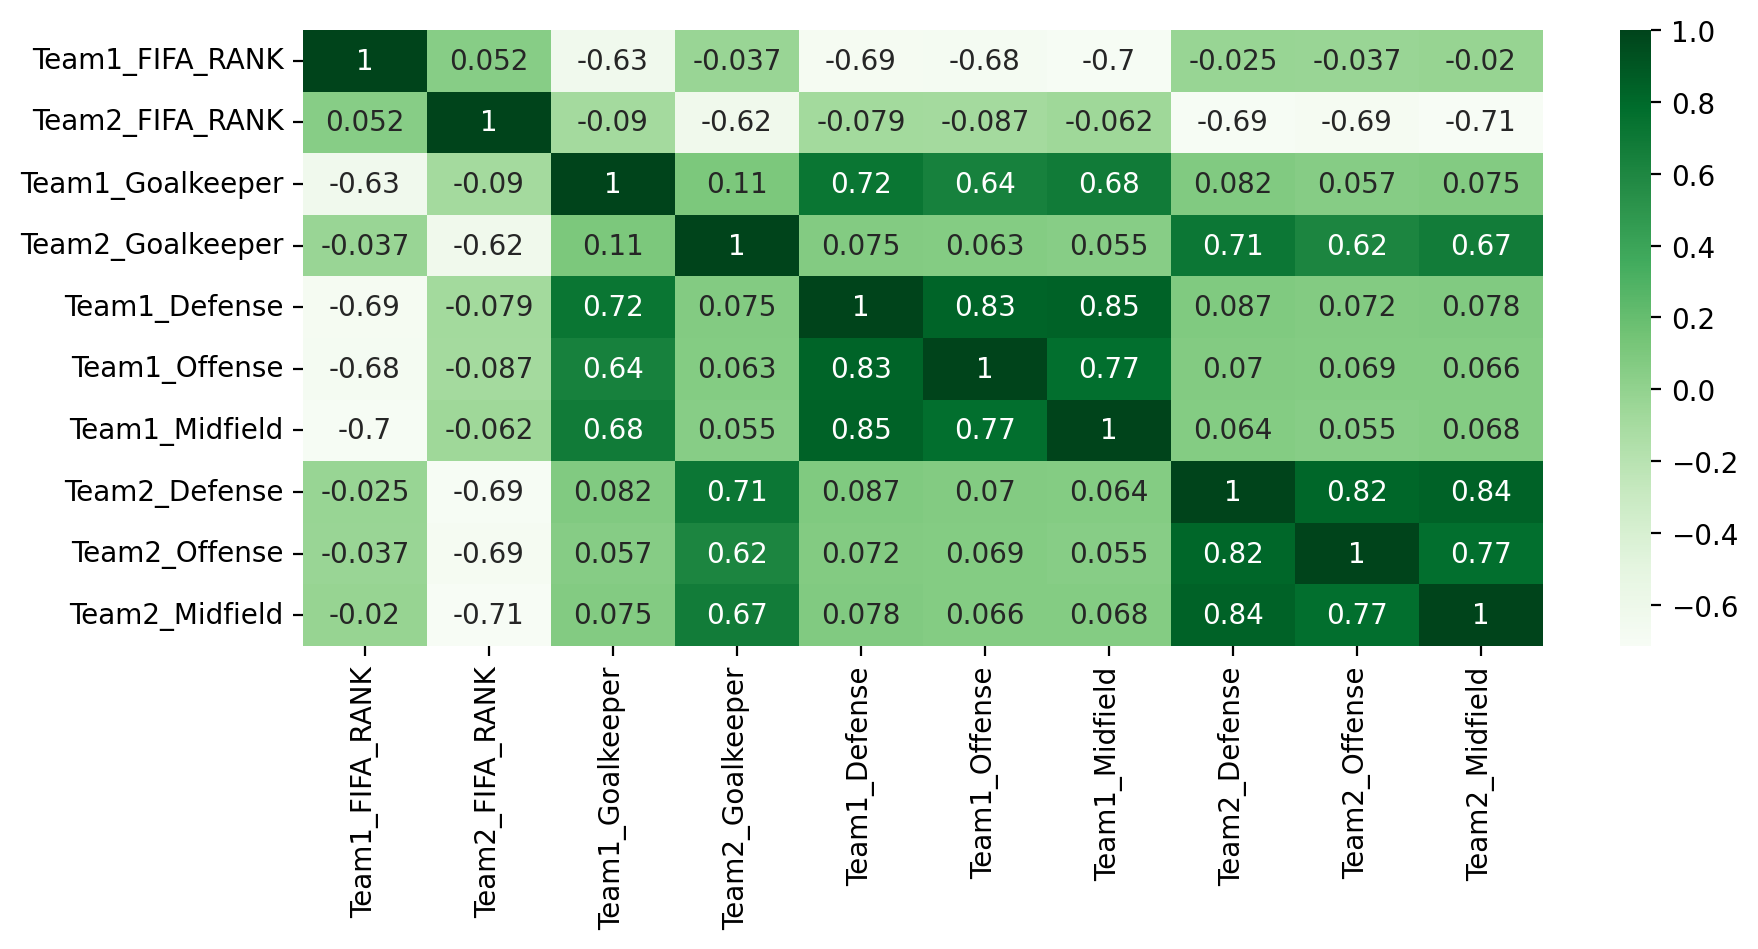

In [13]:
# plot heatmape to see correlation
plt.figure(figsize=(10, 4), dpi=200)
sns.heatmap(final_df.corr(), cmap="Greens", annot=True)

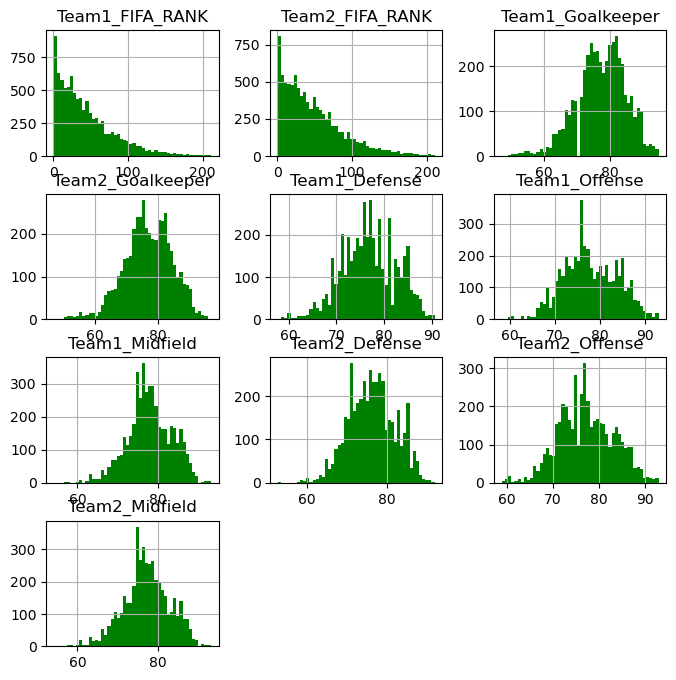

In [14]:
# check for variable distribution
_=final_df[final_df.columns].hist(bins = 50, figsize = (8,8), color = 'green')

### Take care of the null value

array([[<AxesSubplot:title={'center':'Null'}>]], dtype=object)

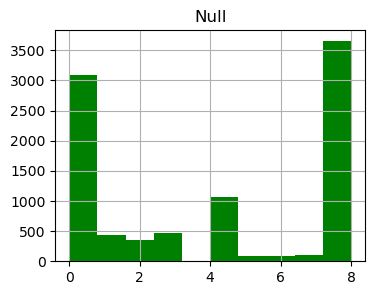

In [50]:
# see how null value distribute across rows for final_df
null_dist = final_df.isnull().sum(axis=1).tolist()
null_dist = pd.DataFrame(null_dist, columns = ['Null'])
null_dist.hist(figsize = (4,3), color = 'green')

In [51]:
# the length of null_dist is the same as & generated from final_df, so index should be the same too
null_dist['Null'].count()

9321

In [52]:
null_dist[(null_dist['Null'] > 4)].index #3925 rows have more than 4 NAs

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9109, 9110, 9113, 9114, 9118, 9122, 9127, 9140, 9249, 9266],
           dtype='int64', length=3925)

In [53]:
# drop rows with more than 4 NAs
new_df = final_df.drop(null_dist[(null_dist['Null'] > 4)].index, inplace = False )
new_df = new_df.reset_index().drop(['index'],axis=1)
new_df.shape

(5396, 13)

array([[<AxesSubplot:title={'center':'Null'}>]], dtype=object)

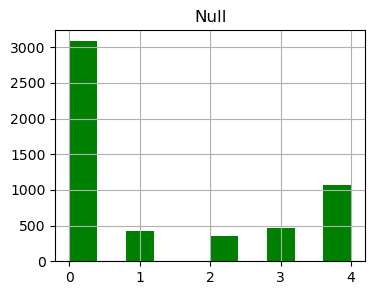

In [54]:
# check the distribution of NAs now, much better I think
new_null_dist = new_df.isnull().sum(axis=1).tolist()
new_null_dist = pd.DataFrame(new_null_dist, columns = ['Null'])
new_null_dist.hist(figsize = (4,3),color = 'green')

In [55]:
# compute the mean value for each column
mean_values = new_df.mean()

# fill null values in each column with the corresponding mean value
new_df = new_df.fillna(mean_values)

new_df.isnull().sum()# no NAs!

Team1               0
Team2               0
Team1_FIFA_RANK     0
Team2_FIFA_RANK     0
Team1_Result        0
Team1_Goalkeeper    0
Team2_Goalkeeper    0
Team1_Defense       0
Team1_Offense       0
Team1_Midfield      0
Team2_Defense       0
Team2_Offense       0
Team2_Midfield      0
dtype: int64

In [41]:
# 5396 data point, that not much but fair
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5396 entries, 0 to 5395
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team1             5396 non-null   object 
 1   Team2             5396 non-null   object 
 2   Team1_FIFA_RANK   5396 non-null   int64  
 3   Team2_FIFA_RANK   5396 non-null   int64  
 4   Team1_Result      5396 non-null   object 
 5   Team1_Goalkeeper  5396 non-null   float64
 6   Team2_Goalkeeper  5396 non-null   float64
 7   Team1_Defense     5396 non-null   float64
 8   Team1_Offense     5396 non-null   float64
 9   Team1_Midfield    5396 non-null   float64
 10  Team2_Defense     5396 non-null   float64
 11  Team2_Offense     5396 non-null   float64
 12  Team2_Midfield    5396 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 548.2+ KB


In [56]:
# in case you don't want to repeat work, delete # and run the following 2 chunks
#new_df.to_csv("./data/preprocessed.csv",index=False)

In [58]:
new_df = pd.read_csv('./data/preprocessed.csv')
new_df.tail()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper,Team2_Goalkeeper,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
5391,Netherlands,Wales,10,18,Win,81.0,74.000000,85.2,83.0,83.5,75.000000,73.0,78.5
5392,Poland,Belgium,26,2,Lose,87.0,89.000000,75.2,84.7,75.8,80.800000,85.7,85.5
5393,Chile,Ghana,28,60,Lose,79.0,74.000000,75.5,76.7,78.2,75.500000,76.0,78.2
5394,Japan,Tunisia,23,35,Lose,73.0,76.634753,75.2,75.0,77.5,70.800000,72.3,74.0
5395,Korea Republic,Egypt,29,32,Win,75.0,76.634753,73.0,80.0,73.8,76.207957,79.3,70.8


### Data partition

In [59]:
# data partition
seed = 42
X = new_df.drop('Team1_Result',axis=1)
y = new_df['Team1_Result']
from sklearn.model_selection import train_test_split

# 70% training and 30% validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=seed)

In [60]:
X_train.shape, y_train.shape

((3777, 12), (3777,))

In [61]:
X_train.columns

Index(['Team1', 'Team2', 'Team1_FIFA_RANK', 'Team2_FIFA_RANK',
       'Team1_Goalkeeper', 'Team2_Goalkeeper', 'Team1_Defense',
       'Team1_Offense', 'Team1_Midfield', 'Team2_Defense', 'Team2_Offense',
       'Team2_Midfield'],
      dtype='object')

In [62]:
# avoid error due to high cardinality by identifying those exist in valid but not training data
index1 = X_valid[~X_valid['Team1'].isin(X_train['Team1'])].index
index2 = X_valid[~X_valid['Team2'].isin(X_train['Team2'])].index

In [63]:
type(index1)

pandas.core.indexes.numeric.Int64Index

In [64]:
[index1, index2]

[Int64Index([1732, 4232, 2337, 2456, 2092, 3712, 1400, 3864, 4905, 4620], dtype='int64'),
 Int64Index([2104, 4572, 2077, 1966, 4335, 752, 3410], dtype='int64')]

In [65]:
# find the values that appear in either list
unique_values = list(set(index1) | set(index2))
len(unique_values)

17

In [66]:
X_valid.shape, y_valid.shape

((1619, 12), (1619,))

In [67]:
# drop rows
X_valid = X_valid.drop(unique_values)
y_valid = y_valid.drop(unique_values)
X_valid.shape, y_valid.shape

((1602, 12), (1602,))

In the above section, we did 2 things:
1. partition the data into 70% training and 30% validation using random seed = 42
2. manually delete column in validation but not validation to avoid error when training model. It is the curse of high cardinality in our data Team1 and Team2 column that we have to painfully forgo 17 rows and now we end up having *3777 rows in training and 1619 rows in validation set*.

In [68]:
# no offence, just want to express how annoying data encoding is!

### [Data encoding](https://www.kaggle.com/discussions/getting-started/104651). [Uh Huh](https://getemoji.com) 🤬
If you perform the encoding before the split, it will lead to data leakage (train-test contamination) which is discussed greatly on Lesson 7 of Intermediate Machine Learning course. In the sense, you will introduce new data (integers of Label Encoders) and use it for your models thus it will affect the end predictions results (good validation scores but poor in deployment).

That's why to resolve the error, the notebook explains two options: **1) Drop the columns that have different values in train data and validation data - the simplest one.** 2) Introducing custom label encoder for new categories.

After the train and validation data category already matched up, you can perform fit_transform on the train data, then only transform for the validation data - based on the encoding maps from train data.

In [69]:
# encode predictors
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder for each categorical column
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()

# fit the encoders to the categorical columns
encoder1.fit(X_train['Team1'])
encoder2.fit(X_train['Team2'])

# encode the categorical columns in the training and validation data
X_train['Team1'] = encoder1.transform(X_train['Team1'])
X_train['Team2'] = encoder2.transform(X_train['Team2'])
X_valid['Team1'] = encoder1.transform(X_valid['Team1'])
X_valid['Team2'] = encoder2.transform(X_valid['Team2'])

# check predictor data shape
X_train.shape, X_valid.shape

((3777, 12), (1602, 12))

In [70]:
# now teams are represented by numbers/code
X_train.head(5)

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Goalkeeper,Team2_Goalkeeper,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
1541,124,130,56,36,80.0,77.000000,71.5,74.0,76.0,77.800000,77.000000,73.2
2252,112,119,4,100,84.0,73.000000,76.5,83.3,86.0,71.200000,71.000000,73.2
4986,162,68,20,83,76.0,76.634753,75.5,76.7,75.2,76.207957,77.467714,64.5
3936,49,141,15,55,82.0,88.000000,82.8,83.3,82.8,75.200000,76.000000,77.2
2874,34,136,5,63,76.0,65.000000,75.8,83.0,80.8,75.000000,79.700000,74.8


In [71]:
X_train['Team1'] = X_train['Team1'].astype("category")
X_train['Team2'] = X_train['Team2'].astype("category")
X_valid['Team1'] = X_valid['Team1'].astype("category")
X_valid['Team2'] = X_valid['Team2'].astype("category")

In [72]:
# let's check the variable type
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777 entries, 1541 to 860
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Team1             3777 non-null   category
 1   Team2             3777 non-null   category
 2   Team1_FIFA_RANK   3777 non-null   int64   
 3   Team2_FIFA_RANK   3777 non-null   int64   
 4   Team1_Goalkeeper  3777 non-null   float64 
 5   Team2_Goalkeeper  3777 non-null   float64 
 6   Team1_Defense     3777 non-null   float64 
 7   Team1_Offense     3777 non-null   float64 
 8   Team1_Midfield    3777 non-null   float64 
 9   Team2_Defense     3777 non-null   float64 
 10  Team2_Offense     3777 non-null   float64 
 11  Team2_Midfield    3777 non-null   float64 
dtypes: category(2), float64(8), int64(2)
memory usage: 350.2 KB


In [73]:
# create 3 level for target variable
y_train = y_train.map({'Win':1, 'Draw':2, 'Lose':0})
y_valid = y_valid.map({'Win':1, 'Draw':2, 'Lose':0})

In [74]:
y_train

1541    0
2252    1
4986    1
3936    1
2874    2
       ..
3772    1
5191    1
5226    1
5390    1
860     0
Name: Team1_Result, Length: 3777, dtype: int64

## Models

In [75]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    print(classification_report(y_valid,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_valid,y_pred);

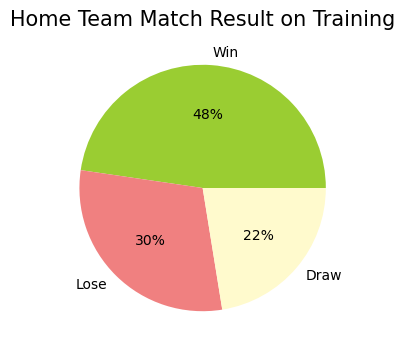

In [76]:
unique_result = y_train.value_counts()

# Plot
fig, axes = plt.subplots(1, 1, figsize=(4,4))
ax =plt.pie(unique_result ,labels = ['Win', 'Lose', 'Draw'], colors=['yellowgreen','lightcoral','lemonchiffon'], autopct='%.0f%%')
plt.title('Home Team Match Result on Training', fontsize = 15)
plt.get_cmap('jet')
plt.show()

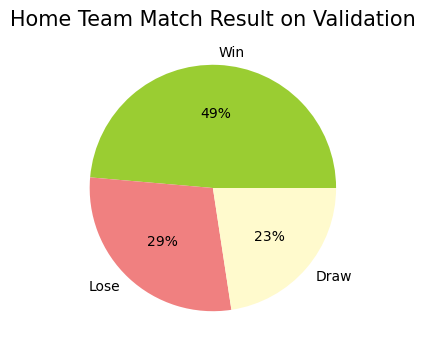

In [77]:
unique_result = y_valid.value_counts()

# Plot
fig, axes = plt.subplots(1, 1, figsize=(4,4))
ax =plt.pie(unique_result ,labels = ['Win', 'Lose', 'Draw'], colors=['yellowgreen','lightcoral','lemonchiffon'], autopct='%.0f%%')
plt.title('Home Team Match Result on Validation', fontsize = 15)
plt.get_cmap('jet')
plt.show()

### <font color='blue'>Logistic Regression</font>

In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)

In [79]:
# model performance
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_valid)

# Calculate the misclassification rate
misclassification_rate = 1 - accuracy_score(y_valid, y_pred)
print("Misclassification rate: ", misclassification_rate)

conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion matrix: \n", conf_matrix)

Misclassification rate:  0.4013732833957553
Confusion matrix: 
 [[299 162   0]
 [119 660   0]
 [149 213   0]]


              precision    recall  f1-score   support

           0       0.53      0.65      0.58       461
           1       0.64      0.85      0.73       779
           2       0.00      0.00      0.00       362

    accuracy                           0.60      1602
   macro avg       0.39      0.50      0.44      1602
weighted avg       0.46      0.60      0.52      1602



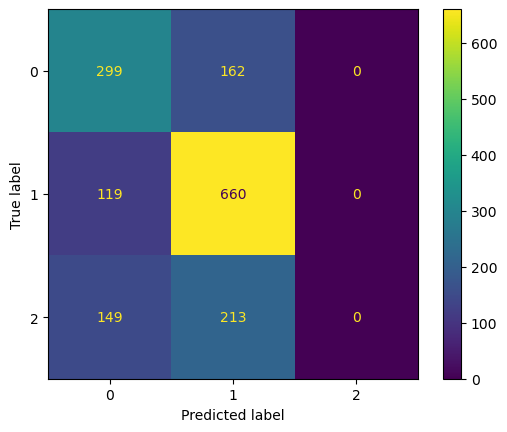

In [80]:
#'Win':1, 'Draw':2, 'Lose':0
metrics_display(LogisticRegression(multi_class='multinomial'))

### [Naive Bayes](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python/notebook#10.-Feature-Engineering-)

In [81]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_valid)

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score: 0.5868


In [82]:
# Calculate the misclassification rate
misclassification_rate = 1 - accuracy_score(y_valid, y_pred)
print("Misclassification rate: ", misclassification_rate)
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion matrix: \n", conf_matrix)

Misclassification rate:  0.4132334581772784
Confusion matrix: 
 [[302 119  40]
 [119 599  61]
 [154 169  39]]


              precision    recall  f1-score   support

           0       0.53      0.66      0.58       461
           1       0.68      0.77      0.72       779
           2       0.28      0.11      0.16       362

    accuracy                           0.59      1602
   macro avg       0.49      0.51      0.49      1602
weighted avg       0.54      0.59      0.55      1602



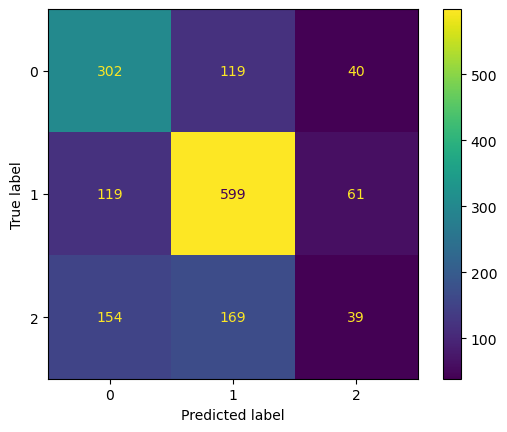

In [83]:
#'Win':1, 'Draw':2, 'Lose':0
metrics_display(GaussianNB())

### <font color='blue'>KNN</font>

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = knn.predict(X_valid)

misclassification_rate = 1 - accuracy_score(y_valid, y_pred)
print("Misclassification rate: ", misclassification_rate)

Misclassification rate:  0.49063670411985016


In [85]:
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion matrix: \n", conf_matrix)

Confusion matrix: 
 [[274 113  74]
 [200 484  95]
 [158 146  58]]


              precision    recall  f1-score   support

           0       0.43      0.59      0.50       461
           1       0.65      0.62      0.64       779
           2       0.26      0.16      0.20       362

    accuracy                           0.51      1602
   macro avg       0.45      0.46      0.44      1602
weighted avg       0.50      0.51      0.50      1602



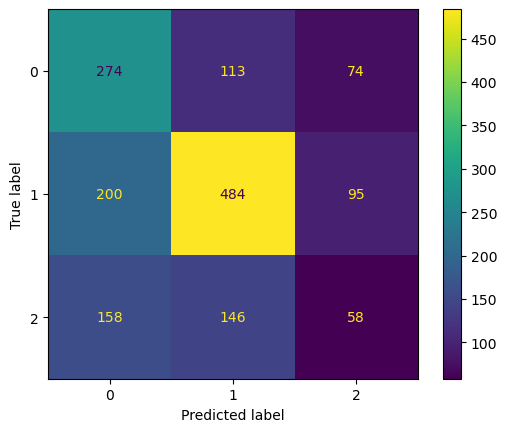

In [86]:
#'Win':1, 'Draw':2, 'Lose':0
metrics_display(KNeighborsClassifier(n_neighbors=3))

#### Better KNN

In [86]:
from sklearn.model_selection import GridSearchCV
grid_param={"n_neighbors": range(1,30,1)}
grid_search = GridSearchCV(estimator=knn,param_grid=grid_param)

In [87]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=14),
             param_grid={'n_neighbors': range(1, 30)})

In [88]:
grid_search.best_params_

{'n_neighbors': 26}

In [87]:
# using best k under 30 {'n_neighbors': 26}
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=26).fit(X_train, y_train)
y_pred = knn.predict(X_valid)

misclassification_rate = 1 - accuracy_score(y_valid, y_pred)
print("Misclassification rate: ", misclassification_rate)

Misclassification rate:  0.4244694132334582


In [88]:
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion matrix: \n", conf_matrix)

Confusion matrix: 
 [[272 159  30]
 [116 634  29]
 [142 204  16]]


              precision    recall  f1-score   support

           0       0.51      0.59      0.55       461
           1       0.64      0.81      0.71       779
           2       0.21      0.04      0.07       362

    accuracy                           0.58      1602
   macro avg       0.45      0.48      0.45      1602
weighted avg       0.51      0.58      0.52      1602



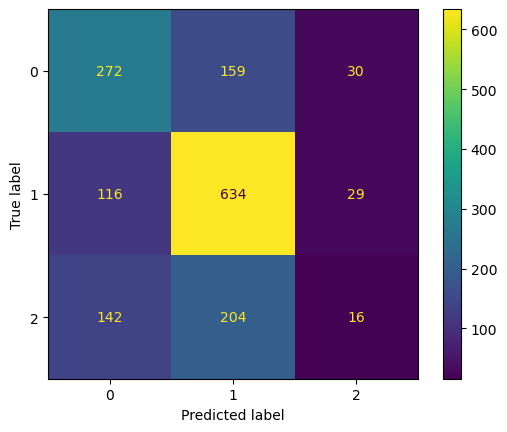

In [89]:
#'Win':1, 'Draw':2, 'Lose':0
metrics_display(KNeighborsClassifier(n_neighbors=26))

### <font color='blue'>Tree</font>

In [90]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=seed)
clf.fit(X_train, y_train)

# Make predictions on the validation dataset
y_pred = clf.predict(X_valid)

# Calculate the misclassification rate
misclassification_rate = 1 - accuracy_score(y_valid, y_pred)
print("Misclassification rate: ", misclassification_rate)

Misclassification rate:  0.5218476903870162


In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion matrix: \n", conf_matrix)

Confusion matrix: 
 [[205 135 121]
 [149 467 163]
 [119 149  94]]


              precision    recall  f1-score   support

           0       0.43      0.44      0.44       461
           1       0.62      0.60      0.61       779
           2       0.25      0.26      0.25       362

    accuracy                           0.48      1602
   macro avg       0.43      0.43      0.43      1602
weighted avg       0.48      0.48      0.48      1602



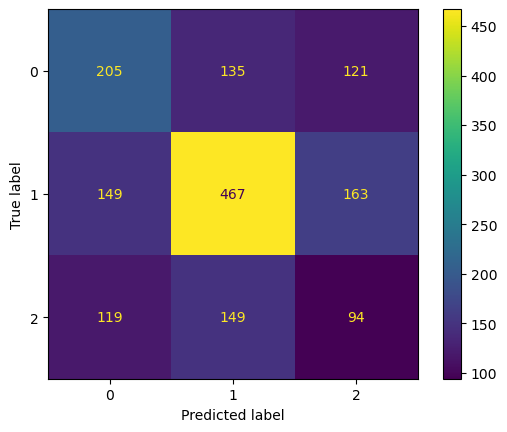

In [92]:
#'Win':1, 'Draw':2, 'Lose':0
metrics_display(DecisionTreeClassifier(random_state=seed))

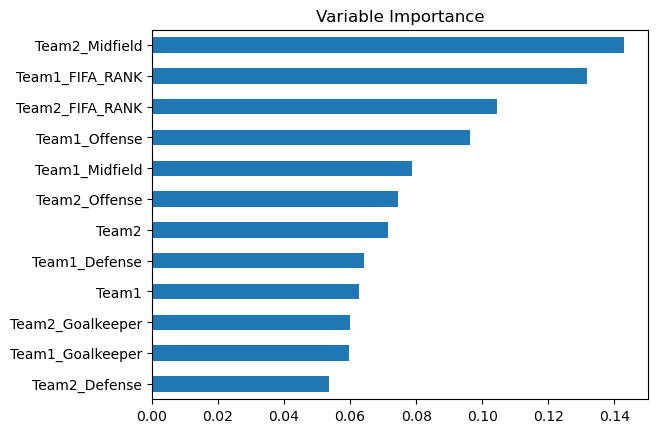

In [77]:
# display variable importance:
importances = pd.DataFrame(clf.feature_importances_,
                           index=X_train.columns,
                           columns=['Importance'])
_ = importances.sort_values(by='Importance').plot(kind='barh', 
                                                  title='Variable Importance', 
                                                  legend=False)

### <font color='blue'>Random Forest</font>

In [48]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier: 
'''
Number of tree in forest = 100
Number of terms sampled per split = 3~4? given default is sqrt(number of predictors)
Number of terms = 12
Minimum split per tree = 10
Minimum size split = 5
random_state = 42
'''
clf=RandomForestClassifier(n_estimators=100,
                           max_depth = 2000,
                           min_samples_split = 10,
                           min_samples_leaf=5,
                           random_state=seed)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2000, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [49]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
y_pred=clf.predict(X_valid)
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.6036204744069913


In [50]:
# Calculate the misclassification rate
misclassification_rate = 1 - accuracy_score(y_valid, y_pred)
print("Misclassification rate: ", misclassification_rate)

Misclassification rate:  0.3963795255930087


In [51]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion matrix: \n", conf_matrix)

Confusion matrix: 
 [[300 139  22]
 [ 98 653  28]
 [145 203  14]]


              precision    recall  f1-score   support

           0       0.55      0.65      0.60       461
           1       0.66      0.84      0.74       779
           2       0.22      0.04      0.07       362

    accuracy                           0.60      1602
   macro avg       0.48      0.51      0.47      1602
weighted avg       0.53      0.60      0.54      1602



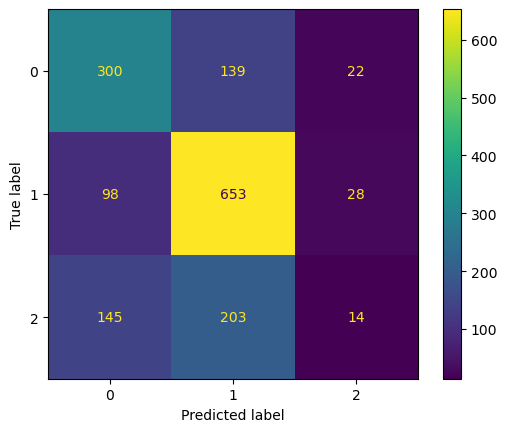

In [57]:
#'Win':1, 'Draw':2, 'Lose':0
metrics_display(RandomForestClassifier(n_estimators=100,
                           max_depth = 2000,
                           min_samples_split = 10,
                           min_samples_leaf=5,
                           random_state=seed))

In [67]:
clf.feature_importances_

array([0.05453329, 0.05667708, 0.12540538, 0.10948704, 0.05921791,
       0.0638483 , 0.0783484 , 0.08469337, 0.07616092, 0.10042859,
       0.0924334 , 0.09876631])

In [68]:
clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=2000, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)>

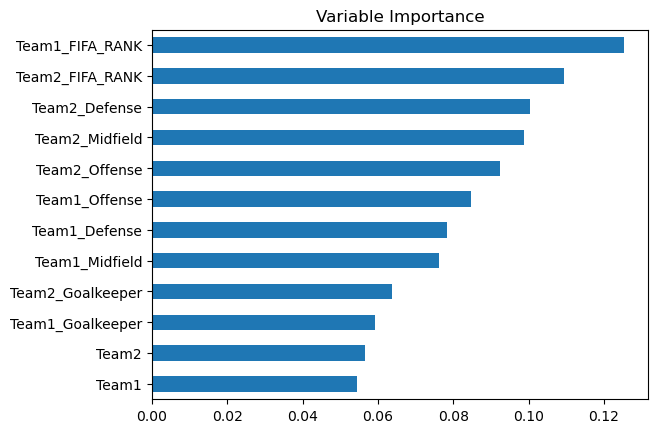

In [66]:
# Interesting, the output is very different from JMP, I wonder why 🧐 
importances = pd.DataFrame(clf.feature_importances_,
                           index=X_valid.columns,
                           columns=['Importance'])
_ = importances.sort_values(by='Importance').plot(kind='barh', 
                                                  title='Variable Importance', 
                                                  legend=False)

#### finding better parameter for random forest

In [87]:
grid_param={"n_estimators":[80,100,120], 
            "criterion":['gini', 'entropy'], 
            "max_depth":[5,100,2000], 
            "min_samples_split":[5,10,15], 
            "min_samples_leaf":[5,10,15], 
            "max_features":['sqrt','log2']
}

In [90]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=3,n_jobs=-1,verbose=3)

In [91]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.596 total time=   0.8s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.597 total time=   0.8s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.596 total time=   0.8s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.598 total time=   0.8s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=120;, score=0.604 total time=   1.2s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.593 total time=   0.7s
[CV 1/3] END criterion=g

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=2000,
                                              min_samples_leaf=5,
                                              min_samples_split=10,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 100, 2000],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [80, 100, 120]},
             verbose=3)

In [92]:
grid_search.best_params_
"""
{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'n_estimators': 120}
"""

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'n_estimators': 120}

In [93]:
#using the best parameters
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(criterion = 'entropy',
                           n_estimators = 120,
                           max_depth = 100,
                           max_features = 'sqrt',
                           min_samples_leaf = 15,
                           min_samples_split = 5,
                           random_state=seed)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                       min_samples_leaf=15, min_samples_split=5,
                       n_estimators=120, random_state=42)

In [94]:
# Calculate the misclassification rate
y_pred=clf.predict(X_valid)
misclassification_rate = 1 - accuracy_score(y_valid, y_pred)
print("Misclassification rate: ", misclassification_rate)

Misclassification rate:  0.385143570536829


In [95]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion matrix: \n", conf_matrix)

Confusion matrix: 
 [[314 143   4]
 [106 668   5]
 [149 210   3]]


              precision    recall  f1-score   support

           0       0.55      0.68      0.61       461
           1       0.65      0.86      0.74       779
           2       0.25      0.01      0.02       362

    accuracy                           0.61      1602
   macro avg       0.49      0.52      0.46      1602
weighted avg       0.53      0.61      0.54      1602



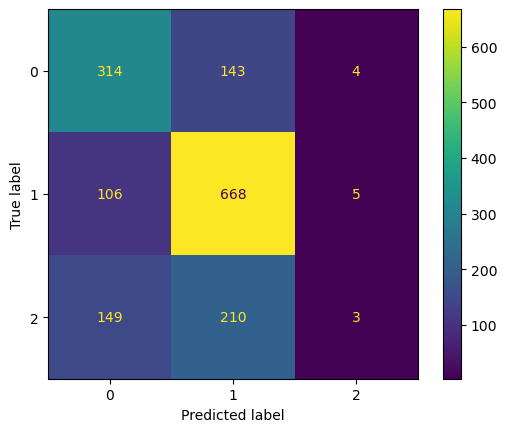

In [96]:
metrics_display(RandomForestClassifier(criterion = 'entropy',
                           n_estimators = 120,
                           max_depth = 100,
                           max_features = 'sqrt',
                           min_samples_leaf = 15,
                           min_samples_split = 5,
                           random_state=seed))

### Neural Network

In [97]:
# load data for one hot encoding for a neural network
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

new_df = pd.read_csv('./data/preprocessed.csv')
new_df.tail()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper,Team2_Goalkeeper,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
5391,Netherlands,Wales,10,18,Win,81.0,74.000000,85.2,83.0,83.5,75.000000,73.0,78.5
5392,Poland,Belgium,26,2,Lose,87.0,89.000000,75.2,84.7,75.8,80.800000,85.7,85.5
5393,Chile,Ghana,28,60,Lose,79.0,74.000000,75.5,76.7,78.2,75.500000,76.0,78.2
5394,Japan,Tunisia,23,35,Lose,73.0,76.634753,75.2,75.0,77.5,70.800000,72.3,74.0
5395,Korea Republic,Egypt,29,32,Win,75.0,76.634753,73.0,80.0,73.8,76.207957,79.3,70.8


In [98]:
# data partition again
seed = 42
X = new_df.drop('Team1_Result',axis=1)
y = new_df['Team1_Result']
from sklearn.model_selection import train_test_split

# 70% training and 30% validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=seed)

# avoid error due to high cardinality by identifying those exist in valid but not training data
index1 = X_valid[~X_valid['Team1'].isin(X_train['Team1'])].index
index2 = X_valid[~X_valid['Team2'].isin(X_train['Team2'])].index

# find the values that appear in either list
unique_values = list(set(index1) | set(index2))

# drop rows
X_valid = X_valid.drop(unique_values)
y_valid = y_valid.drop(unique_values)
X_valid.shape, y_valid.shape

((1602, 12), (1602,))

In [99]:
X_train.head(3)

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Goalkeeper,Team2_Goalkeeper,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
1541,Poland,Romania,56,36,80.0,77.000000,71.5,74.0,76.0,77.800000,77.000000,73.2
2252,Netherlands,Northern Ireland,4,100,84.0,73.000000,76.5,83.3,86.0,71.200000,71.000000,73.2
4986,USA,Haiti,20,83,76.0,76.634753,75.5,76.7,75.2,76.207957,77.467714,64.5


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_valid = onehot_encoder.transform(X_valid)

In [107]:
X_train[['Team1','Team2']].head(3)

,Team1,Team2
1541,Poland,Romania
2252,Netherlands,Northern Ireland
4986,USA,Haiti


In [110]:
X_train[X_train.columns[2:]].head(3)

,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Goalkeeper,Team2_Goalkeeper,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
1541,56,36,80.0,77.000000,71.5,74.0,76.0,77.800000,77.000000,73.2
2252,4,100,84.0,73.000000,76.5,83.3,86.0,71.200000,71.000000,73.2
4986,20,83,76.0,76.634753,75.5,76.7,75.2,76.207957,77.467714,64.5


In [119]:
categorical_cols = ['Team1','Team2']

In [121]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#One-hot-encode the categorical columns -- outputs an array instead of dataframe!
array_hot_encoded = ohe.fit_transform(X_train[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=X_train.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = X_train.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [123]:
data_out.head() #Err I will just use JMP

,0,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Goalkeeper,Team2_Goalkeeper,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
1541,"(0, 124)\t1.0\n (0, 304)\t1.0",56,36,80.0,77.000000,71.5,74.0,76.0,77.800000,77.000000,73.2
2252,"(0, 112)\t1.0\n (0, 293)\t1.0",4,100,84.0,73.000000,76.5,83.3,86.0,71.200000,71.000000,73.2
4986,"(0, 162)\t1.0\n (0, 242)\t1.0",20,83,76.0,76.634753,75.5,76.7,75.2,76.207957,77.467714,64.5
3936,"(0, 49)\t1.0\n (0, 315)\t1.0",15,55,82.0,88.000000,82.8,83.3,82.8,75.200000,76.000000,77.2
2874,"(0, 34)\t1.0\n (0, 310)\t1.0",5,63,76.0,65.000000,75.8,83.0,80.8,75.000000,79.700000,74.8


## Conclusion